### integration to fastai v1

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
path = Path("../DATA/airbus-ship/")

In [5]:
(path/"segmentation").ls()

[PosixPath('../DATA/airbus-ship/segmentation/test_segmentation.csv'),
 PosixPath('../DATA/airbus-ship/segmentation/train_masks'),
 PosixPath('../DATA/airbus-ship/segmentation/trn_segmentation.csv'),
 PosixPath('../DATA/airbus-ship/segmentation/test_masks')]

In [6]:
(path/"segmentation/train_masks").ls()[:5]

[PosixPath('../DATA/airbus-ship/segmentation/train_masks/fdbe68f70.jpg.npy'),
 PosixPath('../DATA/airbus-ship/segmentation/train_masks/98f735813.jpg.npy'),
 PosixPath('../DATA/airbus-ship/segmentation/train_masks/9ff607cbe.jpg.npy'),
 PosixPath('../DATA/airbus-ship/segmentation/train_masks/d987e64df.jpg.npy'),
 PosixPath('../DATA/airbus-ship/segmentation/train_masks/f708bcc5d.jpg.npy')]

In [7]:
(path/"segmentation/train_masks").ls()[:5]

[PosixPath('../DATA/airbus-ship/segmentation/train_masks/fdbe68f70.jpg.npy'),
 PosixPath('../DATA/airbus-ship/segmentation/train_masks/98f735813.jpg.npy'),
 PosixPath('../DATA/airbus-ship/segmentation/train_masks/9ff607cbe.jpg.npy'),
 PosixPath('../DATA/airbus-ship/segmentation/train_masks/d987e64df.jpg.npy'),
 PosixPath('../DATA/airbus-ship/segmentation/train_masks/f708bcc5d.jpg.npy')]

In [8]:
train_seg_lbs = pd.read_csv(path/"segmentation/trn_segmentation.csv")
test_seg_lbs = pd.read_csv(path/"segmentation/test_segmentation.csv")

In [9]:
unique_img_ids = train_seg_lbs.ImageId.unique()
trn_fnames, val_fnames = train_test_split(unique_img_ids, test_size=0.1, random_state=42)

In [10]:
test_fnames = test_seg_lbs.ImageId.unique()

In [11]:
TRN_X = [f"train/{fname}" for fname in trn_fnames]
TRN_Y = [f"segmentation/train_masks/{fname}.npy" for fname in trn_fnames]

VAL_X = [f"train/{fname}" for fname in val_fnames]
VAL_Y = [f"segmentation/train_masks/{fname}.npy" for fname in val_fnames]

TEST_X = [f"test/{fname}" for fname in test_fnames]
TEST_Y = [f"segmentation/test_masks/{fname}.npy" for fname in test_fnames]

In [12]:
test_sub_fnames = list((path/"test_v2").glob("*.jpg"))

In [13]:
TEST_SUB_X = [f"test_v2/{fname.name}" for fname in test_sub_fnames]

In [14]:
len(TRN_X), len(VAL_X), len(TEST_X), len(TEST_SUB_X)

(34356, 3818, 4382, 15606)

In [15]:
path

PosixPath('../DATA/airbus-ship')

### Data

In [16]:
class DatasetBase(Dataset):
    "Base class for all fastai datasets."
    def __init__(self, c:int): self.c,self.item = c,None
    def __len__(self): return len(getattr(self, 'x', [1]))
    def set_item(self,item): self.item = item
    def clear_item(self): self.item = None
    def __repr__(self): return f'{type(self).__name__} of len {len(self)}'

    @abstractmethod
    def _get_x(self,i): pass
    @abstractmethod
    def _get_y(self,i): pass

    def __getitem__(self, i):
        if self.item is None: return self._get_x(i),self._get_y(i)
        else: return self.item,0

In [17]:
class SegmentationDataset(DatasetBase):
    "A dataset for segmentation task."
    def __init__(self, path:PathOrStr, x:FilePathList, y:FilePathList, classes:Collection[Any]):
        assert len(x)==len(y)
        super().__init__(c=None)
        self.x,self.y = np.array(x),np.array(y)
        self.loss_func = CrossEntropyFlat()
        self.classes = classes
        self.path = path
    
    def _get_x(self, i):
        return open_image(self.path/self.x[i])
        
    def _get_y(self, i):    
        return ImageSegment(torch.from_numpy(np.load(self.path/self.y[i])).float()[None,:])

In [18]:
trn_ds = SegmentationDataset(path, x=TEST_X, y=TEST_Y, classes=None)
val_ds = SegmentationDataset(path, x=VAL_X, y=VAL_Y , classes=None)
test_ds = SegmentationDataset(path, x=TEST_X, y=TEST_Y, classes=None)

In [19]:
data = ImageDataBunch.create(train_ds=trn_ds,
                             valid_ds=val_ds,
                             test_ds=test_ds,
                             path=path,
                             bs=4, num_workers=8, size=768,
                             do_crop=True,
                             ds_tfms=get_transforms(),
                             tfm_y=True)

In [20]:
data.test_ds[0][1].data.unique()

tensor([1, 0])

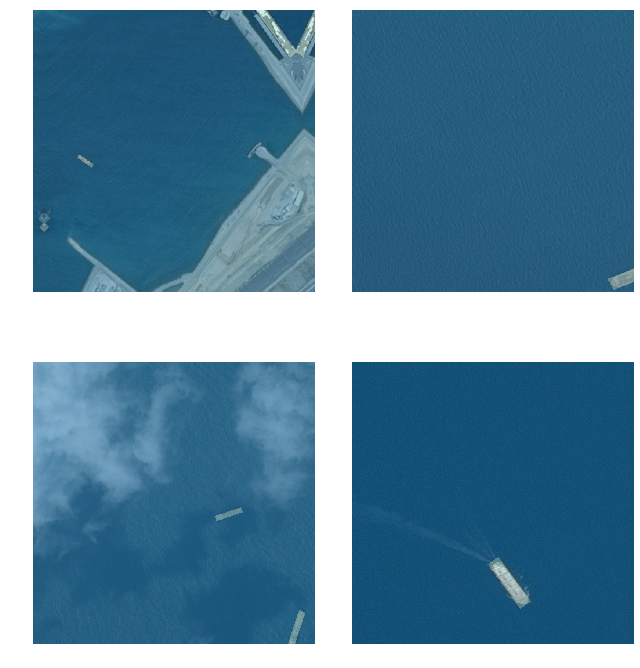

In [21]:
data.show_batch(2)

### Model

In [1]:
import sys

In [2]:
sys.path.append("../inplace_abn/")

In [11]:
from modules.functions import *

ImportError: No module named 'inplace_abn'

In [ ]:
test_

In [62]:
from test_vistas_single_gpu import *

ImportError: No module named 'inplace_abn'

In [ ]:
# Create network
norm_act = partial(InPlaceABN, activation="leaky_relu", slope=.01)
body = models.__dict__["net_wider_resnet38_a2"](norm_act=norm_act, dilation=(1, 2, 4, 4))
head = DeeplabV3(4096, 256, 256, norm_act=norm_act, pooling_size=(84, 84))


In [ ]:
model_data = (path_abn/"wide_resnet38_deeplab_vistas.pth.tar")

In [23]:
learn = aa

TypeError: unsupported operand type(s) for %: 'NoneType' and 'int'

TypeError: unsupported operand type(s) for %: 'NoneType' and 'int'

In [ ]:
Learner.